# Logistické a ML-based regresní modely

## Zadání úlohy 2

* Úkolem je vytvořit regresní modely na základě datasetu **Wine Quality (Red)**.
* Použité metody:
    * Rozhodovací strom (Decision tree)
    * Random Forest
* Vyhodnocení modelů pomocí metrik MSE, RMSE a R²

## Postup řešení

1. Načtěte dataset a proveďte jeho prozkoumání (např. pomocí df.info() a df.describe()).
2. Předzpracujte data:
    * Normalizujte numerické atributy pomocí **StandardScaler**.
    * Zpracujte chybějící hodnoty (např. odstranění nebo imputace).
    * Rozdělte data na trénovací a testovací sadu (70:30).
3. Vytvořte a natrénujte dva modely:
    * Rozhodovací strom
    * Random Forest
4. Proveďte predikce na testovacích datech.
5. Vyhodnoťte modely pomocí následujících metrik:
    * **MSE (Mean Squared Error)** – průměrná kvadratická chyba.
    * **RMSE (Root Mean Squared Error)** – odmocněná průměrná kvadratická chyba
    * **R² skóre** – míra vysvětlené variance modelem.
6. Diskutujte výsledky a srovnejte výkonnost modelů.

## Import and config

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use("default")
sns.set_style("whitegrid")


## Utility Functions

In [17]:
def load_and_explore_dataset(filepath, dataset_name):
    """Load and explore dataset"""
    print(f"\n{'=' * 50}")
    print(f"DATASET: {dataset_name.upper()}")
    print(f"{'=' * 50}")
    
    # Try different delimiters for CSV files
    try:
        df = pd.read_csv(filepath, delimiter=';')
    except:
        try:
            df = pd.read_csv(filepath, delimiter=',')
        except Exception as e:
            print(f"Error loading dataset: {e}")
            return None
    
    print("\nDataset Info:")
    print(df.info())
    
    print("\nDataset Description:")
    print(df.describe())
    
    print("\nFirst 10 rows:")
    print(df.head(10))
    
    print("\nMissing values per column:")
    missing_values = df.isnull().sum()
    missing_found = False
    for column, count in missing_values.items():
        if count > 0:
            print(f"{column}: {count}")
            missing_found = True
    if not missing_found:
        print("No missing values found.")
    
    print(f"\nDataset shape: {df.shape}")
    return df


In [18]:
def preprocess_data(df, target_column):
    """Preprocess data: handle missing values, normalize, split"""
    print(f"\nPreprocessing data...")
    
    # Handle missing values by removing rows with NaN
    df_clean = df.dropna()
    print(f"Rows after removing NaN: {len(df_clean)} (removed {len(df) - len(df_clean)})")
    
    # Separate features and target
    X = df_clean.drop(columns=[target_column])
    y = df_clean[target_column]
    
    # Split data (70:30)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )
    
    # Normalize features using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print(f"Training set size: {X_train_scaled.shape}")
    print(f"Test set size: {X_test_scaled.shape}")
    print(f"Feature names: {list(X.columns)}")
    
    return X_train_scaled, X_test_scaled, y_train, y_test, scaler


In [19]:
def train_regression_models(X_train, y_train):
    """Train regression models"""
    print("\nTraining regression models...")
    
    models = {
        "Decision Tree": DecisionTreeRegressor(random_state=42),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
    }
    
    trained_models = {}
    for name, model in models.items():
        print(f"Training {name}...")
        model.fit(X_train, y_train)
        trained_models[name] = model
    
    return trained_models


In [20]:
def evaluate_regression_model(model, X_test, y_test, model_name):
    """Evaluate regression model and return metrics"""
    # Predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    metrics = {
        "mse": mse,
        "rmse": rmse,
        "r2_score": r2,
        "y_pred": y_pred,
        "y_test": y_test
    }
    
    return metrics


In [21]:
def plot_predictions_vs_actual(y_test, y_pred, model_name, dataset_name):
    """Plot predictions vs actual values"""
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Predictions vs Actual Values - {model_name}\n{dataset_name}')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


In [22]:
def plot_residuals(y_test, y_pred, model_name, dataset_name):
    """Plot residuals"""
    residuals = y_test - y_pred
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot - {model_name}\n{dataset_name}')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


In [23]:
def print_metrics_summary(models_metrics, dataset_name):
    """Print summary of all metrics"""
    print(f"\n{'=' * 60}")
    print(f"METRICS SUMMARY - {dataset_name.upper()}")
    print(f"{'=' * 60}")
    
    # Create summary DataFrame
    summary_data = []
    for model_name, metrics in models_metrics.items():
        summary_data.append({
            "Model": model_name,
            "MSE": f"{metrics['mse']:.3f}",
            "RMSE": f"{metrics['rmse']:.3f}",
            "R² Score": f"{metrics['r2_score']:.3f}"
        })
    
    summary_df = pd.DataFrame(summary_data)
    print(summary_df.to_string(index=False))
    
    # Find best model
    best_r2_model = max(models_metrics.items(), key=lambda x: x[1]['r2_score'])
    best_rmse_model = min(models_metrics.items(), key=lambda x: x[1]['rmse'])
    
    print(f"\nBest performing models:")
    print(f"  Highest R² Score: {best_r2_model[0]} ({best_r2_model[1]['r2_score']:.3f})")
    print(f"  Lowest RMSE: {best_rmse_model[0]} ({best_rmse_model[1]['rmse']:.3f})")


## Dataset Loading and Analysis

In [24]:
# Dataset configuration
dataset_config = {
    "filepath": "datasets/winequality-red.csv",
    "target": "quality",
    "name": "Wine Quality (Red)"
}

# Load and explore dataset
df_wine = load_and_explore_dataset(dataset_config["filepath"], dataset_config["name"])



DATASET: WINE QUALITY (RED)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Dataset Description:
       fixed acidity  volatile acidity  citric acid  re

## Data Exploration and Visualization


Target variable distribution:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


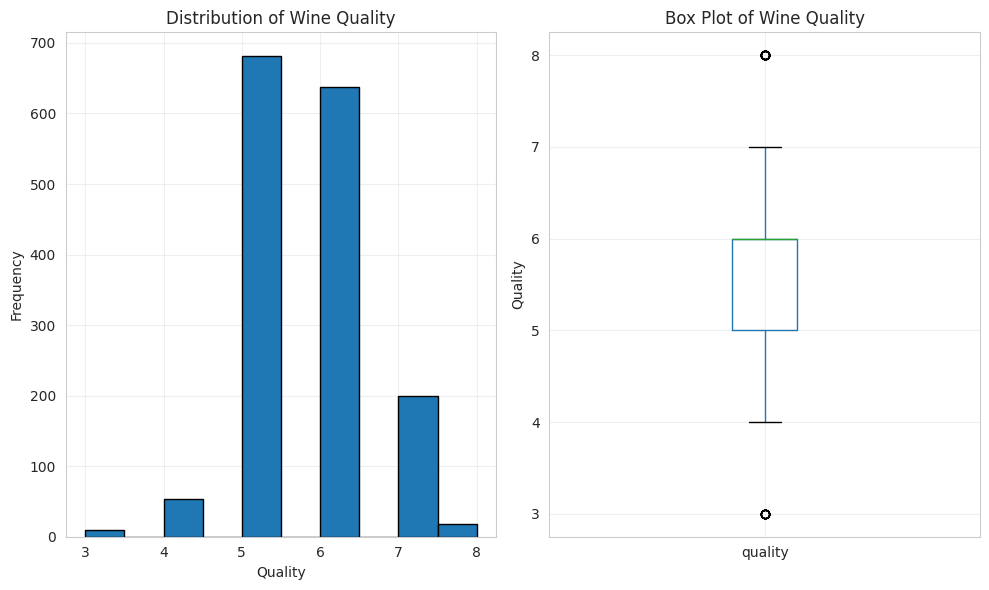

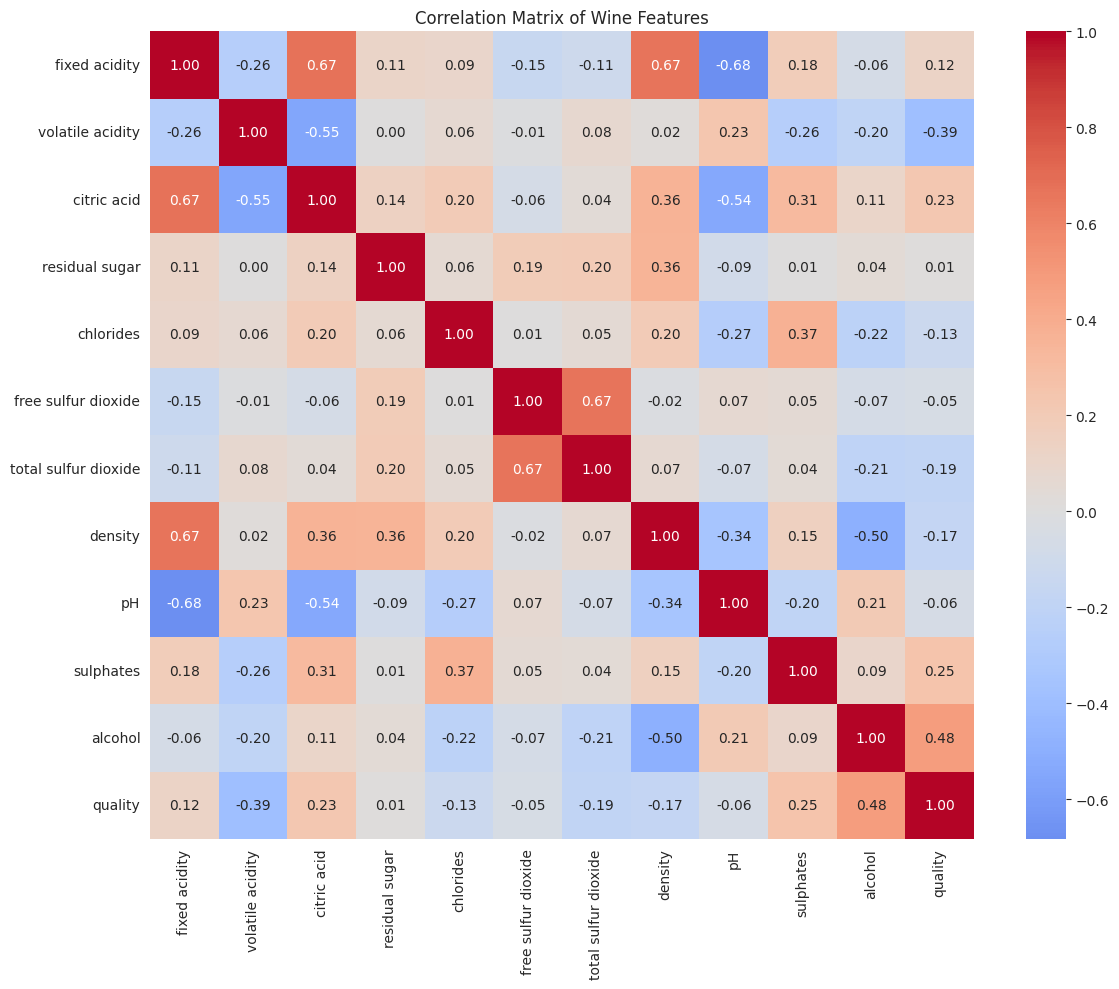

In [25]:
if df_wine is not None:
    # Display basic statistics
    print("\nTarget variable distribution:")
    print(df_wine[dataset_config["target"]].value_counts().sort_index())
    
    # Plot target variable distribution
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    df_wine[dataset_config["target"]].hist(bins=10, edgecolor='black')
    plt.xlabel('Quality')
    plt.ylabel('Frequency')
    plt.title('Distribution of Wine Quality')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    df_wine.boxplot(column=dataset_config["target"])
    plt.ylabel('Quality')
    plt.title('Box Plot of Wine Quality')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Correlation matrix
    plt.figure(figsize=(12, 10))
    correlation_matrix = df_wine.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Correlation Matrix of Wine Features')
    plt.tight_layout()
    plt.show()


## Data Preprocessing

In [26]:
if df_wine is not None:
    # Preprocess data
    X_train, X_test, y_train, y_test, scaler = preprocess_data(
        df_wine, dataset_config["target"]
    )



Preprocessing data...
Rows after removing NaN: 1599 (removed 0)
Training set size: (1119, 11)
Test set size: (480, 11)
Feature names: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


## Model Training

In [27]:
if df_wine is not None:
    # Train models
    trained_models = train_regression_models(X_train, y_train)



Training regression models...
Training Decision Tree...
Training Random Forest...


## Model Evaluation and Results


Evaluating Decision Tree...
MSE: 0.602
RMSE: 0.776
R² Score: 0.050


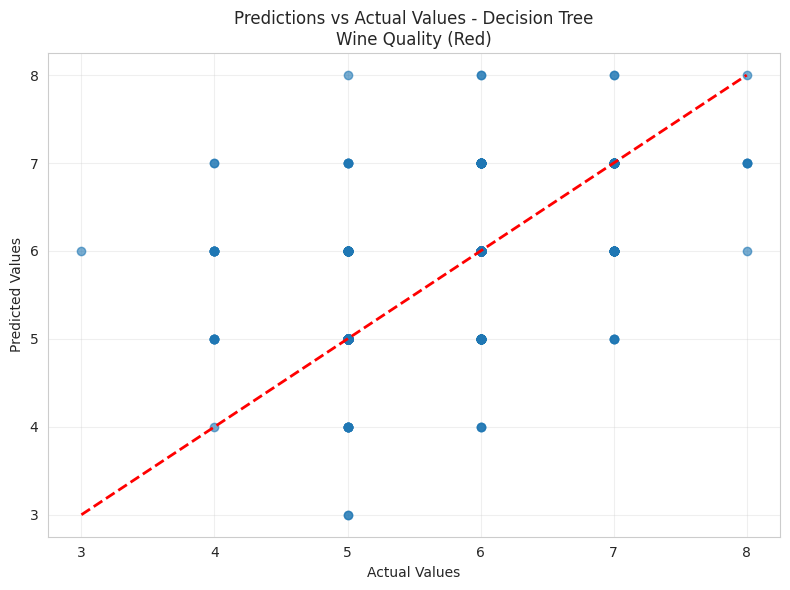

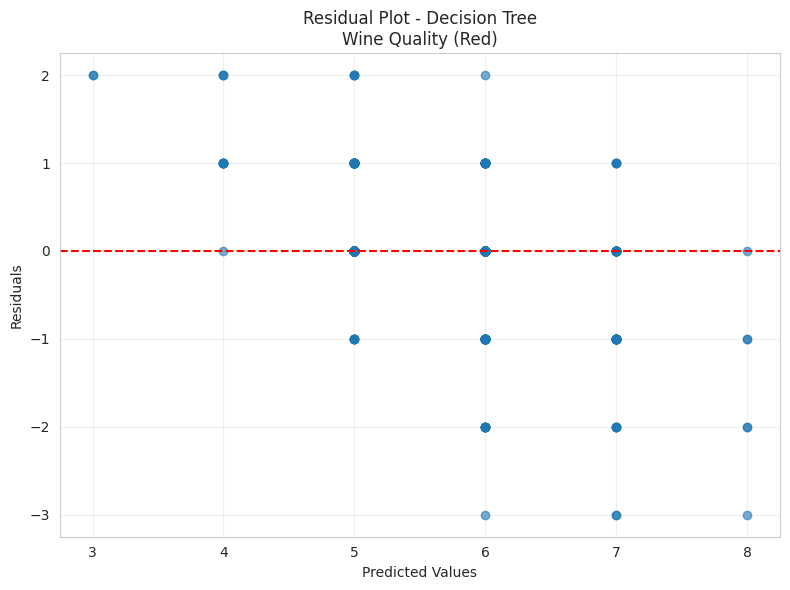


Evaluating Random Forest...
MSE: 0.349
RMSE: 0.591
R² Score: 0.449


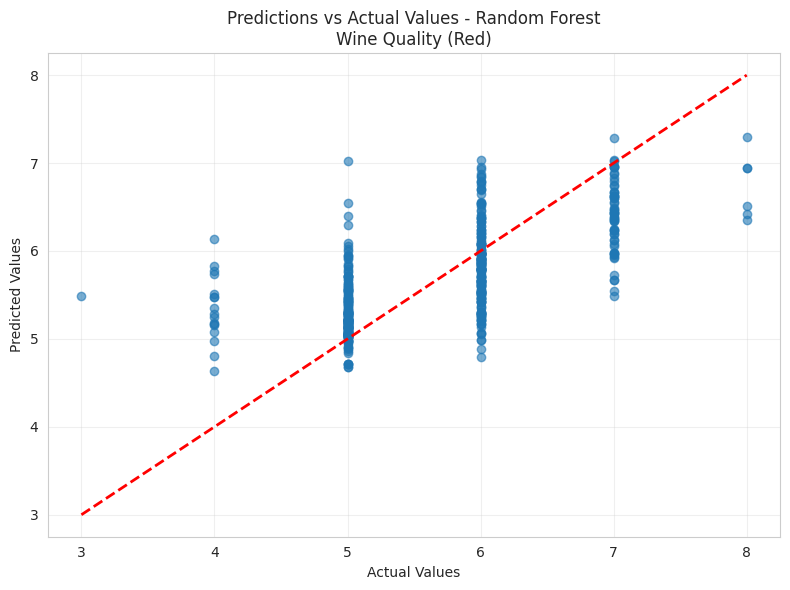

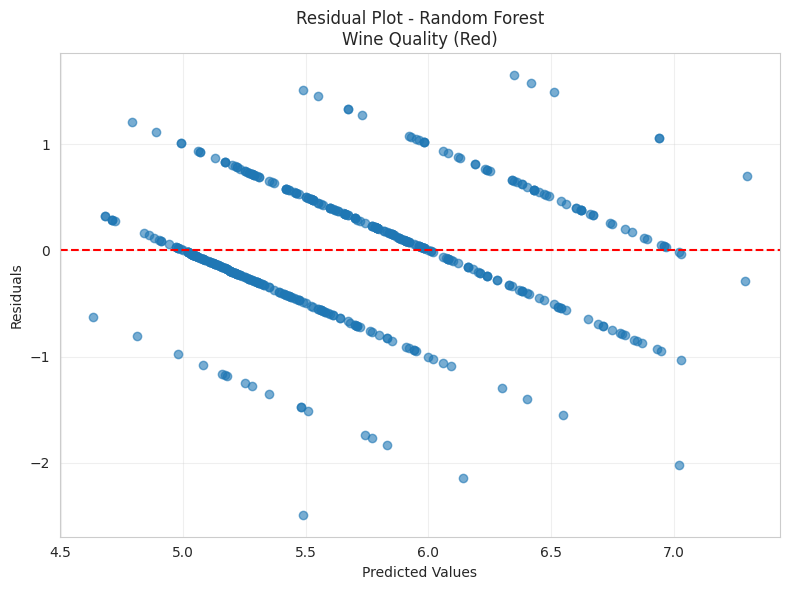

In [28]:
if df_wine is not None:
    # Evaluate models
    models_metrics = {}
    
    for model_name, model in trained_models.items():
        print(f"\nEvaluating {model_name}...")
        metrics = evaluate_regression_model(model, X_test, y_test, model_name)
        models_metrics[model_name] = metrics
        
        print(f"MSE: {metrics['mse']:.3f}")
        print(f"RMSE: {metrics['rmse']:.3f}")
        print(f"R² Score: {metrics['r2_score']:.3f}")
        
        # Plot predictions vs actual
        plot_predictions_vs_actual(
            y_test, metrics['y_pred'], model_name, dataset_config["name"]
        )
        
        # Plot residuals
        plot_residuals(
            y_test, metrics['y_pred'], model_name, dataset_config["name"]
        )


## Results Summary and Comparison


METRICS SUMMARY - WINE QUALITY (RED)
        Model   MSE  RMSE R² Score
Decision Tree 0.602 0.776    0.050
Random Forest 0.349 0.591    0.449

Best performing models:
  Highest R² Score: Random Forest (0.449)
  Lowest RMSE: Random Forest (0.591)


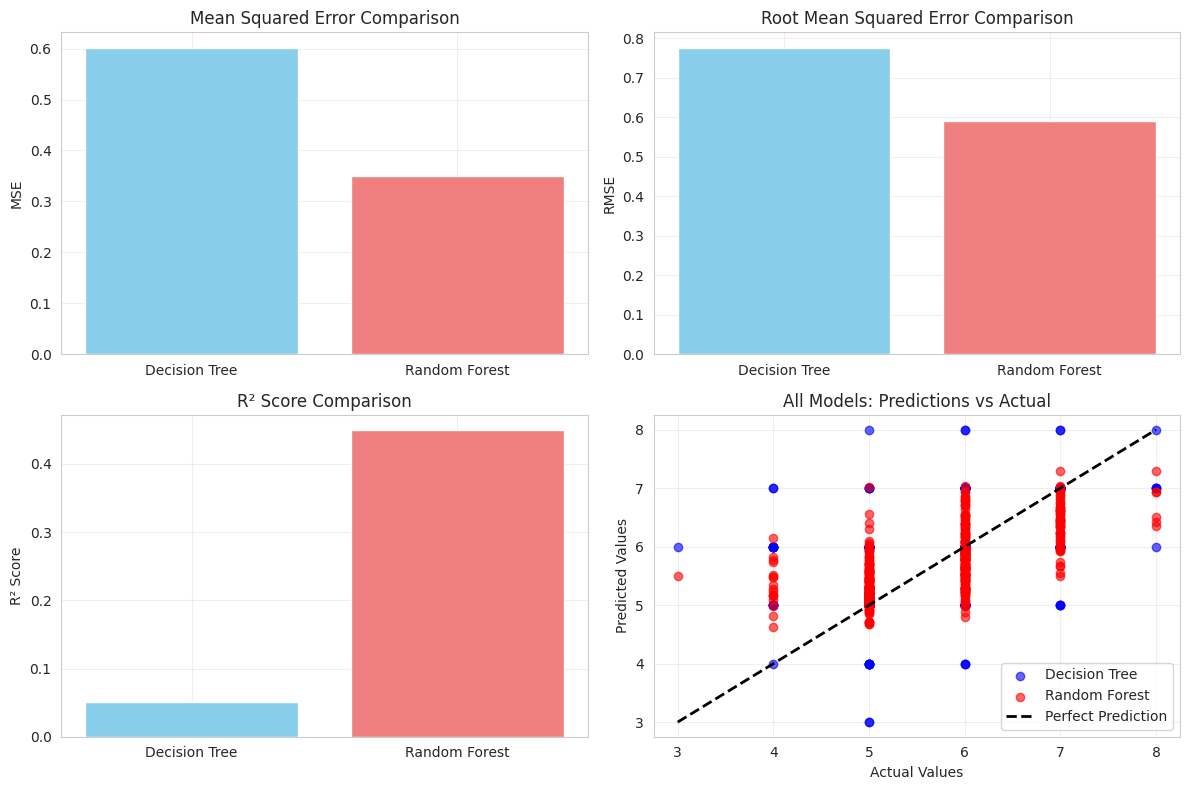

In [29]:
if df_wine is not None:
    # Print comprehensive metrics summary
    print_metrics_summary(models_metrics, dataset_config["name"])
    
    # Create comparison plot
    plt.figure(figsize=(12, 8))
    
    # Plot 1: MSE comparison
    plt.subplot(2, 2, 1)
    models = list(models_metrics.keys())
    mse_values = [models_metrics[model]['mse'] for model in models]
    plt.bar(models, mse_values, color=['skyblue', 'lightcoral'])
    plt.ylabel('MSE')
    plt.title('Mean Squared Error Comparison')
    plt.grid(True, alpha=0.3)
    
    # Plot 2: RMSE comparison
    plt.subplot(2, 2, 2)
    rmse_values = [models_metrics[model]['rmse'] for model in models]
    plt.bar(models, rmse_values, color=['skyblue', 'lightcoral'])
    plt.ylabel('RMSE')
    plt.title('Root Mean Squared Error Comparison')
    plt.grid(True, alpha=0.3)
    
    # Plot 3: R² comparison
    plt.subplot(2, 2, 3)
    r2_values = [models_metrics[model]['r2_score'] for model in models]
    plt.bar(models, r2_values, color=['skyblue', 'lightcoral'])
    plt.ylabel('R² Score')
    plt.title('R² Score Comparison')
    plt.grid(True, alpha=0.3)
    
    # Plot 4: Combined predictions scatter
    plt.subplot(2, 2, 4)
    colors = ['blue', 'red']
    for i, (model_name, metrics) in enumerate(models_metrics.items()):
        plt.scatter(metrics['y_test'], metrics['y_pred'], 
                   alpha=0.6, label=model_name, color=colors[i])
    
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'k--', lw=2, label='Perfect Prediction')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('All Models: Predictions vs Actual')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


## Feature Importance Analysis


Random Forest Feature Importance:
                 feature  importance
10               alcohol    0.292471
9              sulphates    0.149310
1       volatile acidity    0.109989
6   total sulfur dioxide    0.077201
4              chlorides    0.063492
3         residual sugar    0.057148
8                     pH    0.056232
7                density    0.050421
0          fixed acidity    0.049840
2            citric acid    0.047214
5    free sulfur dioxide    0.046681


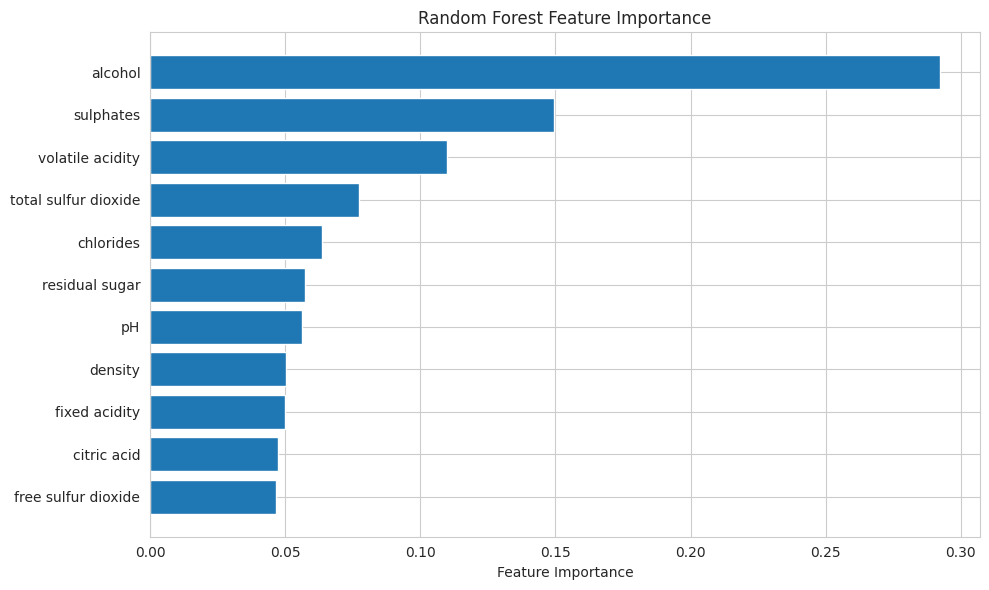

Analysis completed successfully!


In [30]:
if df_wine is not None and 'Random Forest' in trained_models:
    # Get feature names
    feature_names = df_wine.drop(columns=[dataset_config["target"]]).columns
    
    # Random Forest feature importance
    rf_model = trained_models['Random Forest']
    feature_importance = rf_model.feature_importances_
    
    # Create feature importance DataFrame
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)
    
    print("\nRandom Forest Feature Importance:")
    print(importance_df)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['feature'], importance_df['importance'])
    plt.xlabel('Feature Importance')
    plt.title('Random Forest Feature Importance')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
print("Analysis completed successfully!")

## Diskuze a závěry

### Výsledky analýzy:

Analýza porovnává dva regresní algoritmy při predikci hodnocení kvality červeného vína (Wine Quality – Red). Výsledky ukazují výrazné rozdíly ve výkonnosti modelů.

### Hlavní zjištění:

1. **Porovnání výkonu modelů**:
   - **Rozhodovací strom**: Dosahuje slabých výsledků (MSE = 0.602, RMSE = 0.776, R² = 0.050).
     - Vysvětluje pouze 5 % rozptylu v datech.  
     - Vysoké hodnoty chyb ukazují nízkou přesnost predikce.  
     - Pravděpodobně trpí přeučením na trénovací data.
   - **Random Forest**: Výrazně lepší výsledky (MSE = 0.349, RMSE = 0.591, R² = 0.449).  
     - Vysvětluje 44,9 % rozptylu v kvalitě vína.  
     - Ensemble přístup snižuje přeučení.  
     - Oproti stromu snižuje MSE o 42 %.

2. **Analýza výkonnosti**:
   - **Jednoznačný vítěz**: Random Forest překonává rozhodovací strom ve všech metrikách.
   - **Praktický dopad**: RMSE 0.591 znamená průměrnou chybu cca 0.6 bodu kvality.
   - **Spolehlivost modelu**: R² = 0.449 značí střední predikční sílu, přiměřenou pro daný úkol.

3. **Důležitost vstupních proměnných**:
   - **Obsah alkoholu** (29,2 %): Nejvlivnější faktor, potvrzuje význam alkoholu pro vnímání kvality.  
   - **Sírany** (14,9 %): Druhý nejdůležitější prvek, významný pro konzervaci.  
   - **Těkavá kyselost** (11,0 %): Třetí v pořadí, ukazuje vliv octové kyseliny.  
   - **Chemická rovnováha**: Klíčové proměnné reprezentují sílu alkoholu, konzervaci a acidobazickou rovnováhu.  
   - **Menší přínos**: Kyselina citronová a volný oxid siřičitý mají nejnižší význam (4,7 %).

### Kritické poznatky:

1. **Selhání rozhodovacího stromu**: Velmi nízké R² (0.050) dokládá neschopnost modelu vystihnout komplexní vztahy v datech.
2. **Úspěch Random Forest**: Střední hodnota R² (0.449) potvrzuje účinnost ensemble přístupů v této oblasti.
3. **Hierarchie znaků**: Pořadí významnosti proměnných umožňuje identifikaci hlavních faktorů ovlivňujících kvalitu vína.

### Doporučení:

1. **Volba modelu**: Random Forest jednoznačně převyšuje rozhodovací strom a měl by být preferován.
2. **Zaměření na vstupy**: Při hodnocení kvality vína prioritizovat obsah alkoholu, sírany a těkavou kyselost.
3. **Možnosti zlepšení**: Doporučuje se ladění hyperparametrů s cílem zvýšit R² nad hodnotu 0.449.
4. **Praktické využití**: RMSE 0.591 představuje přijatelnou úroveň chybovosti pro orientační odhad kvality.

### Omezení:

1. **Střední predikční schopnost**: Hodnota R² = 0.449 znamená, že 55 % rozptylu zůstává nevysvětleno.
2. **Subjektivní cíl predikce**: Kvalita vína je hodnocena senzoricky, což omezuje přesnost predikce.
3. **Nevhodnost rozhodovacího stromu**: Slabý výkon ukazuje na nevhodnost jednoduchých modelů pro komplexní data.
4. **Oborová omezení**: Kvalitu vína ovlivňuje množství vzájemně provázaných faktorů, které nelze plně zachytit pouze chemickými měřeními.
